# Are 'Soil Moisture Storage' and 'Surface Runoff' significantly linked?
## 1. Background
The inception of surface runoff after precipitation is generally due to saturated soil storage. The strength of the relation between the two is investigated briefly in this report using the data for Chao Phraya and Mun river basins. The relations between these variables are also looked at across basins, provided the strong chances of homogeneity due to basin proximity.

**Typical Surface Runoff:**

![HortonianRunoff](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Runoff_of_soil_%26_fertilizer.jpg/800px-Runoff_of_soil_%26_fertilizer.jpg)

*By Lynn Betts, photographer - U.S. Department of Agriculture, Natural Resources Conservation Service.Filename:NRCSIA99129.tif, Public Domain, https://commons.wikimedia.org/w/index.php?curid=6303766*

## 2. Analysis and Discussions

### Initializing
First, the collected data from both basins, for both parameters, are loaded into python's **pandas** dataframe. The datafiles are separated by hydrologic parameters, while the basin-wise data are separated by columns. Therefore, two dataframe variables are created for each datafiles, and the different basin stations are accessed by column indices. Step by step, the process is as elaborated:

1. The required libraries are imported:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. The datasets are loaded into **pandas** dataframe for exploration and analysis.

NOTE: *A whitespace delimitation regex is passed to ensure correct loading of data*

In [2]:
smoist = pd.read_csv("soil_moisture_storage.txt", sep="\s+")
runoff = pd.read_csv("surface_runoff.txt", sep="\s+")

A sample of the data head is shown below:

In [3]:
smoist.head()

,YYYY,MM,CHAOPHRA,MUN
0,2003,1,1.558493,1.280718
1,2003,2,1.513328,1.247115
2,2003,3,1.494937,1.227956
3,2003,4,1.483420,1.224499
4,2003,5,1.472476,1.245664


3. Each dataframe is checked for **nulls** in the data

In [4]:
print(smoist.info(), runoff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YYYY      120 non-null    int64  
 1   MM        120 non-null    int64  
 2   CHAOPHRA  120 non-null    float64
 3   MUN       120 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YYYY        120 non-null    int64  
 1   MM          120 non-null    int64  
 2   CHAOPHRAYA  120 non-null    float64
 3   MUN         120 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.9 KB
None None


4. For no nulls, the data is proceeded for *Exploratory Data Analysis* in both tabular and graphical formats.

### Exploratory Data Analysis (Tabular)
Initially, the datasets are independently explored and relations between datasets are delved into later. The single-variable **statistical summary** of **<font color="red">Soil Moisture Storage</font>** data for **Chao Phraya** and **Mun** River Basins are tabulated hereafter.

The mean, standard deviation (std), minimum (min), 25 and 75-Percentile OR 0.25 and 0.75-Quantiles (25%, 75%), Median (50%), and the Maximum (max) statistics of the data are conveniently calculated using the **pandas.DataFrame.describe** method:

In [5]:
smoist[["CHAOPHRA","MUN"]].describe()

,CHAOPHRA,MUN
count,120.000000,120.000000
mean,1.581505,1.330137
std,0.083835,0.090006
min,1.461047,1.203563
25%,1.507019,1.250690
50%,1.570350,1.310132
75%,1.645366,1.402911
max,1.783251,1.569585


The minimum and maximum values for each dataset are in rational ranges, and the dataset is likely free from anomaly. The closeness of 25-Percentile value to 50-Percentile compared to 50 to 75 Percentile suggests a positive skew in data. The means across the basins differ by about 0.25 meters which is greater than the standard difference of both datasets, implying significant difference between the basins.

**For variance, histogram, cumulative sums, skewness, and kurtosis:**

In [6]:
print("Variance of Soil Moisture Storage")
# Converted to panel dataframe at the end ONLY for visual enhancement in Jupyter Notebook
pd.DataFrame(smoist[["CHAOPHRA","MUN"]].var())

Variance of Soil Moisture Storage


,0
CHAOPHRA,0.007028
MUN,0.008101


In [7]:
print("Histogram of Soil Moisture Storage of Chao Phraya")
pd.DataFrame(np.histogram(smoist["CHAOPHRA"]))

Histogram of Soil Moisture Storage of Chao Phraya


,0,1,2,3,4,5,6,7,8,9,10
0,17.000000,26.000000,12.000000,17.000000,9.000000,13.000000,11.00000,5.00000,4.000000,6.000000,NaN
1,1.461047,1.493267,1.525488,1.557708,1.589929,1.622149,1.65437,1.68659,1.718811,1.751031,1.783251


In [8]:
print("Histogram of Soil Moisture Storage of Mun")
pd.DataFrame(np.histogram(smoist["MUN"]))

Histogram of Soil Moisture Storage of Mun


,0,1,2,3,4,5,6,7,8,9,10
0,20.000000,22.000000,19.000000,16.00000,7.000000,12.000000,11.000000,9.000000,2.000000,2.000000,NaN
1,1.203563,1.240165,1.276768,1.31337,1.349972,1.386574,1.423176,1.459779,1.496381,1.532983,1.569585


In [9]:
print("Cumulative Sums of Soil Moisture Storage")
pd.DataFrame(smoist[["CHAOPHRA","MUN"]].cumsum())

Cumulative Sums of Soil Moisture Storage


,CHAOPHRA,MUN
0,1.558493,1.280718
1,3.071821,2.527833
2,4.566757,3.755789
3,6.050177,4.980288
4,7.522653,6.225952
...,...,...
115,183.213294,154.106365
116,184.874524,155.529036
117,186.565732,156.943917
118,188.192254,158.305789


In [10]:
print("Skewness of Soil Moisture Storage")
pd.DataFrame(smoist[["CHAOPHRA","MUN"]].skew())

Skewness of Soil Moisture Storage


,0
CHAOPHRA,0.573142
MUN,0.583101


In [11]:
print("Kurtosis of Soil Moisture Storage")
pd.DataFrame(smoist[["CHAOPHRA","MUN"]].kurt())

Kurtosis of Soil Moisture Storage


,0
CHAOPHRA,-0.632744
MUN,-0.711736


Similarly, the sinlge-variable **statistical summary** of **<font color="blue">Surface Runoff</font>** data for Chao Phraya and Mun River Basins are tabulated:

In [12]:
runoff[["CHAOPHRAYA","MUN"]].describe()

,CHAOPHRAYA,MUN
count,1.200000e+02,1.200000e+02
mean,4.152010e-11,4.330062e-11
std,3.758889e-11,3.909336e-11
min,0.000000e+00,0.000000e+00
25%,4.254498e-12,2.634078e-12
50%,3.696111e-11,3.596334e-11
75%,7.029766e-11,7.782819e-11
max,1.378842e-10,1.212606e-10


Similar to the soil moisture data, the closeness of 25-Percentile value to 50-Percentile compared to 50 to 75 Percentile suggests a positive skew in data. However, the means across the basins differ by less than the standard difference of both basins for surface runoff, implying insignificant difference between the dataset means.

**For variance, histogram, cumulative sums, skewness, and kurtosis:**

In [13]:
print("Variance of Surface Runoff")
pd.DataFrame(runoff[["CHAOPHRAYA","MUN"]].var())

Variance of Surface Runoff


,0
CHAOPHRAYA,1.412924e-21
MUN,1.528291e-21


In [14]:
print("Histogram of Surface Runoff of Chao Phraya")
pd.DataFrame(np.histogram(runoff["CHAOPHRAYA"]))

Histogram of Surface Runoff of Chao Phraya


,0,1,2,3,4,5,6,7,8,9,10
0,45.0,8.000000e+00,1.200000e+01,1.100000e+01,1.200000e+01,1.600000e+01,4.000000e+00,7.000000e+00,3.000000e+00,2.000000e+00,NaN
1,0.0,1.378842e-11,2.757685e-11,4.136527e-11,5.515370e-11,6.894212e-11,8.273054e-11,9.651897e-11,1.103074e-10,1.240958e-10,1.378842e-10


In [15]:
print("Histogram of Surface Runoff of Mun")
pd.DataFrame(np.histogram(runoff["MUN"]))

Histogram of Surface Runoff of Mun


,0,1,2,3,4,5,6,7,8,9,10
0,43.0,9.000000e+00,8.000000e+00,5.000000e+00,1.200000e+01,9.000000e+00,1.200000e+01,7.000000e+00,9.000000e+00,6.000000e+00,NaN
1,0.0,1.212606e-11,2.425213e-11,3.637819e-11,4.850425e-11,6.063031e-11,7.275638e-11,8.488244e-11,9.700850e-11,1.091346e-10,1.212606e-10


In [16]:
print("Cumulative Sums of Surface Runoff")
pd.DataFrame(runoff[["CHAOPHRAYA","MUN"]].cumsum())

Cumulative Sums of Surface Runoff


,CHAOPHRAYA,MUN
0,0.000000e+00,5.802304e-13
1,1.226064e-11,8.008129e-12
2,3.970531e-11,2.286534e-11
3,5.439776e-11,5.562744e-11
4,9.049871e-11,1.114758e-10
...,...,...
115,4.777950e-09,5.025393e-09
116,4.908545e-09,5.140888e-09
117,4.962666e-09,5.173499e-09
118,4.981828e-09,5.196065e-09


In [17]:
print("Skewness of Surface Runoff")
pd.DataFrame(runoff[["CHAOPHRAYA","MUN"]].skew())

Skewness of Surface Runoff


,0
CHAOPHRAYA,0.0
MUN,0.0


In [18]:
print("Kurtosis of Surface Runoff")
pd.DataFrame(runoff[["CHAOPHRAYA","MUN"]].kurt())

Kurtosis of Surface Runoff


,0
CHAOPHRAYA,0.0
MUN,0.0


It should be noted that the values for skew and kurtosis for surface runoff have been quantified as zero, indicating a strong possibility for the population distribution to be normal.

### Exploratory Data Analysis (Graphical)
#### Without accounting "Time"

For graphical exploration, initially, **box-plots** and **histograms** for data ranges are developed without considering the time-series factor. Then, the time series is plotted for further information on trend and seasonality. So, **<font color="red">Soil Moisture Storage</font>** and **<font color="blue">Surface Runoff</font>** boxplots for both Chao Phraya and Mun River Basin are drawn as:

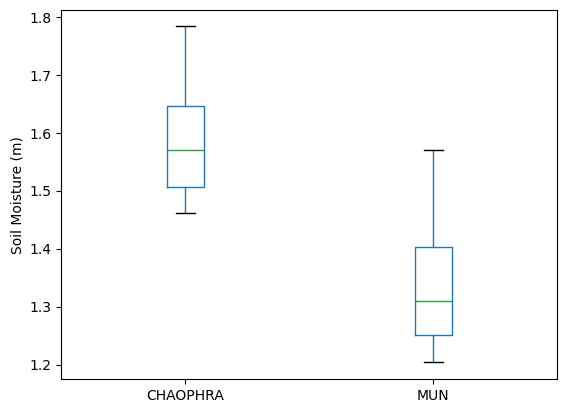

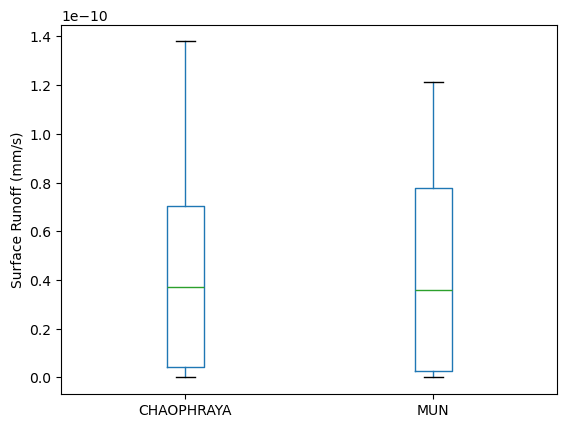

In [19]:
smoist[["CHAOPHRA","MUN"]].boxplot(grid=False, ylabel="Soil Moisture (m)")
plt.show()
runoff[["CHAOPHRAYA","MUN"]].boxplot(grid=False, ylabel="Surface Runoff (mm/s)")
plt.show()

All four (Basin-Data) pairs show a skew towards the higher-value tail consistent with other analyses. While the soil moisture storage for the two basins have visibly distinct means, the surface runoff rates seem much closer. These can be attributed to general differences in intrinsic soil storage capacity at the two basins. This may indicate a weak relationship between intrabasin soil storage and surface runoff. Further, plotting histograms for **<font color="red">Soil Moisture Storage</font>** and **<font color="blue">Surface Runoff</font>**:

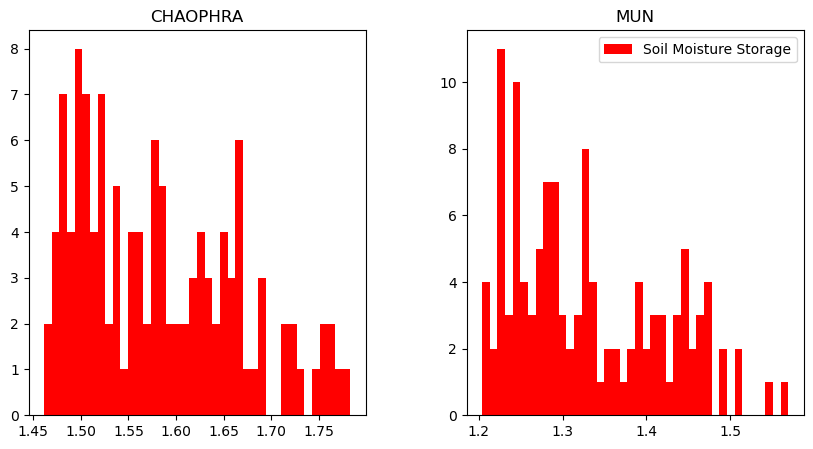

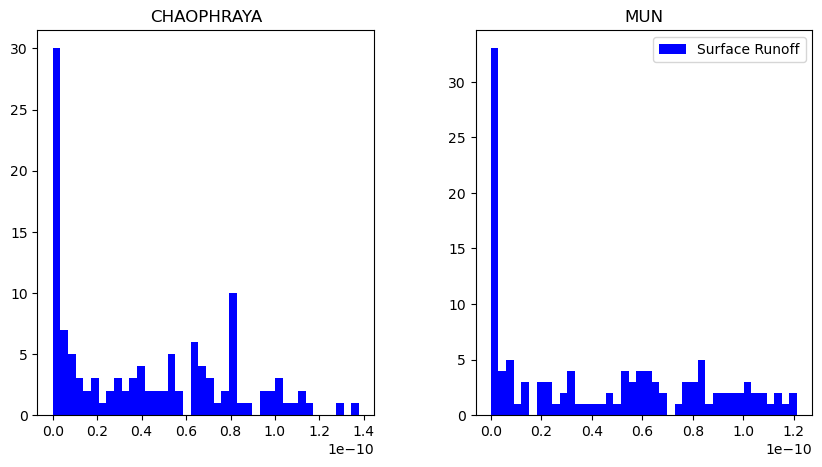

In [20]:
smoist[["CHAOPHRA","MUN"]].hist(bins=40, grid=False, color= "r", label="Soil Moisture Storage", figsize=(10,5))
plt.legend()
runoff[["CHAOPHRAYA","MUN"]].hist(bins=40, grid=False, color="b", label="Surface Runoff", figsize=(10,5))
plt.legend()
plt.show()

Consistent with the box-plots, a skew towards the high-end tails are observed in the histograms. Upon increasing the histogram bins to 40, several gaps and jumps in data-ranges are also seen.

#### With "Time"

Now, for the **time-series** plots for each of the four pairs, it is convenient to plot the data against the default index, i.e. numbered rows. Although this is not strictly time-series due to the use of index instead of actual date, the data is mererly scaled linearly, and can be considered for comparison. Then, the time-series plots of **<font color="red">Soil Moisture Storage</font>** and **<font color="blue">Surface Runoff</font>**, as well as their trend-lines are plotted as:

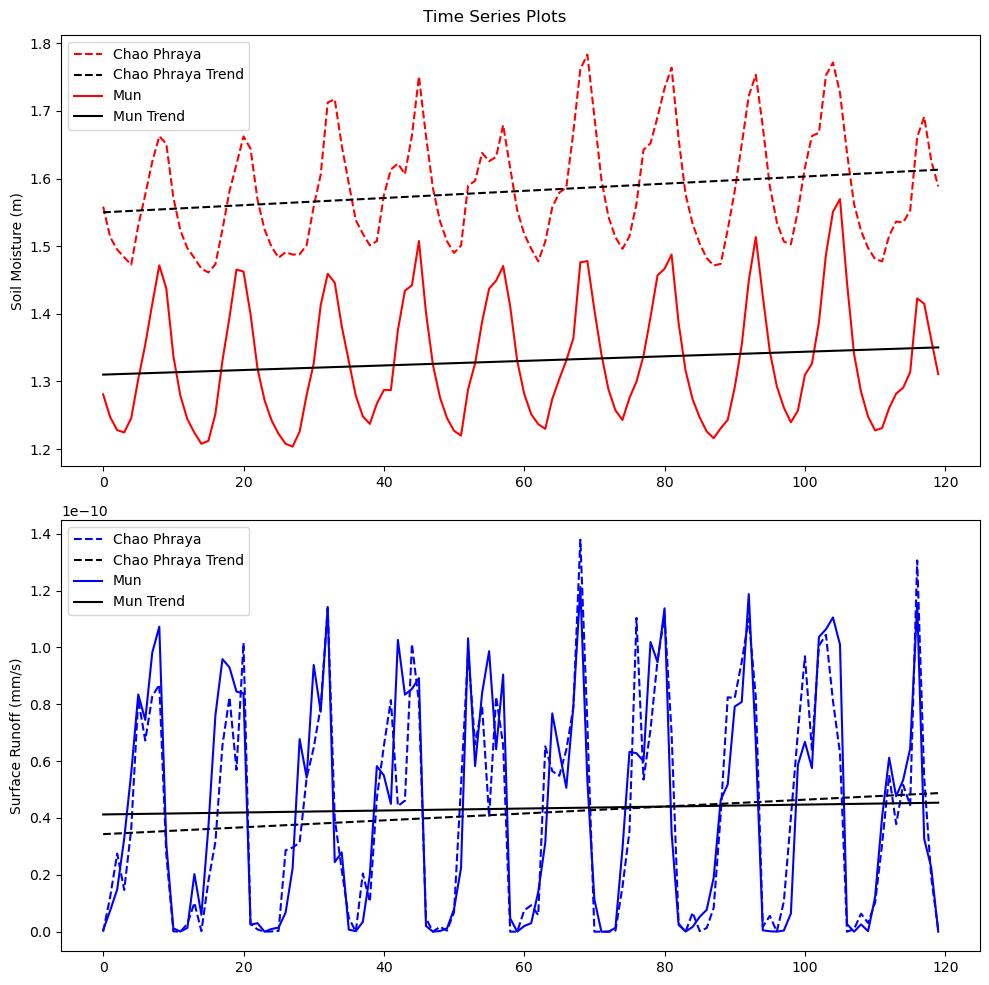

In [21]:
from scipy.stats import linregress
m_smcp,c_smcp,_,_,_ = linregress(range(len(smoist)),smoist["CHAOPHRA"])
m_smm,c_smm,_,_,_ = linregress(range(len(smoist)),smoist["MUN"])
m_srcp,c_srcp,_,_,_ = linregress(range(len(runoff)),runoff["CHAOPHRAYA"])
m_srm,c_srm,_,_,_ = linregress(range(len(runoff)),runoff["MUN"])

fig, ax = plt.subplots(2,1)
fig.suptitle("Time Series Plots")
fig.set_size_inches(10,10)

ax[0].plot(range(len(smoist)),smoist["CHAOPHRA"], color="r", linestyle="--", label="Chao Phraya")
ax[0].plot(range(len(smoist)),(c_smcp+m_smcp*np.array(range(len(smoist)))), color="k", linestyle="--", label="Chao Phraya Trend")
ax[0].plot(range(len(smoist)),smoist["MUN"], color="r", linestyle="-", label="Mun")
ax[0].plot(range(len(smoist)),(c_smm+m_smm*np.array(range(len(smoist)))), color="k", linestyle="-", label="Mun Trend")
ax[0].set_ylabel("Soil Moisture (m)")
ax[0].legend()

ax[1].plot(range(len(runoff)),runoff["CHAOPHRAYA"], color="b", linestyle="--", label="Chao Phraya")
ax[1].plot(range(len(runoff)),(c_srcp+m_srcp*np.array(range(len(runoff)))), color="k", linestyle="--", label="Chao Phraya Trend")
ax[1].plot(range(len(runoff)),runoff["MUN"], color="b", linestyle="-", label="Mun")
ax[1].plot(range(len(runoff)),(c_srm+m_srm*np.array(range(len(runoff)))), color="k", linestyle="-", label="Mun Trend")
ax[1].set_ylabel("Surface Runoff (mm/s)")
ax[1].legend()

plt.tight_layout()
plt.show()

An interesting overtake of the trend of Mun basin's runoff by Chao Phraya basin's surface runoff is observed. Overall, a clear **uptrend** is visible for all four pairs of data. This can, in turn, suggest that even though the data itself is non-stationary, the correlations between the data may have been stationary over time. Therefore, correlations between the two variables within both basins, and correlations of parameters across the basins are investigated in the next section without accounting for the time-dependency of trend.

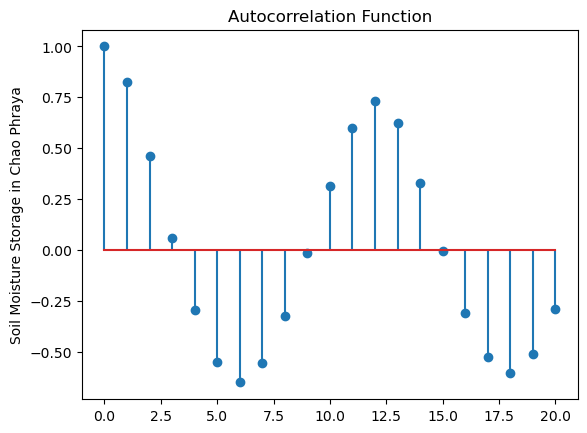

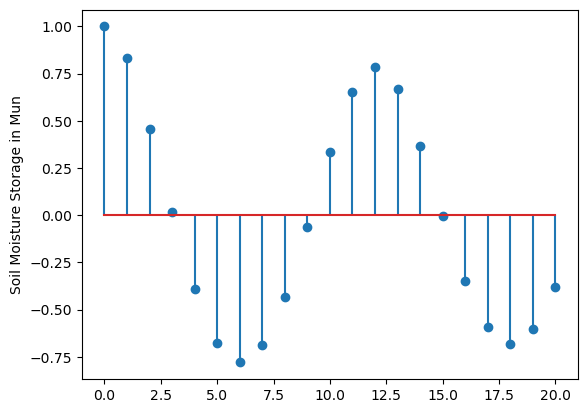

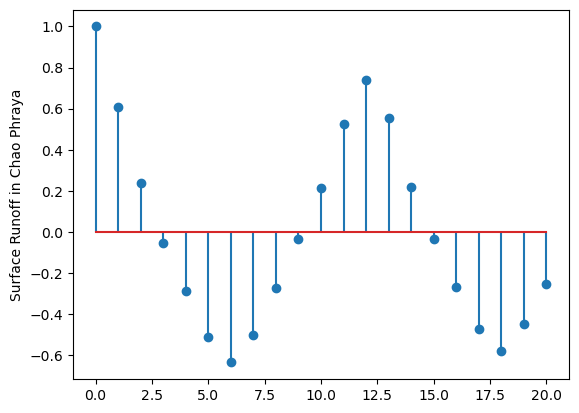

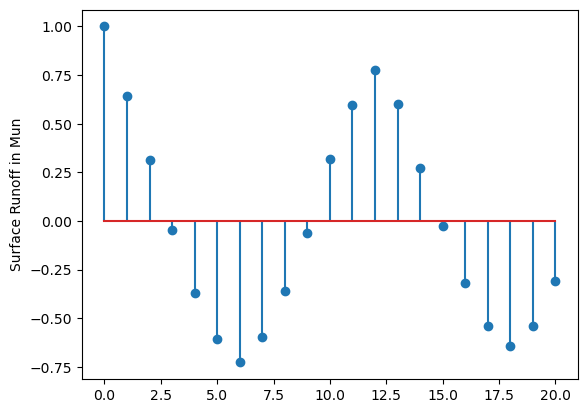

In [22]:
import statsmodels.api as sm
plt.title("Autocorrelation Function")
plt.stem(range(len(sm.tsa.acf(smoist["CHAOPHRA"]))),sm.tsa.acf(smoist["CHAOPHRA"]))
plt.ylabel("Soil Moisture Storage in Chao Phraya")
plt.show()

plt.stem(range(len(sm.tsa.acf(smoist["MUN"]))),sm.tsa.acf(smoist["MUN"]))
plt.ylabel("Soil Moisture Storage in Mun")
plt.show()

plt.stem(range(len(sm.tsa.acf(runoff["CHAOPHRAYA"]))),sm.tsa.acf(runoff["CHAOPHRAYA"]))
plt.ylabel("Surface Runoff in Chao Phraya")
plt.show()

plt.stem(range(len(sm.tsa.acf(runoff["MUN"]))),sm.tsa.acf(runoff["MUN"]))
plt.ylabel("Surface Runoff in Mun")
plt.show()

As expected from the EDA, all four data pairs show a strong seasonality with negative phases at lags of 6 months, and positive phases at lag multiples of 12 months or 1 year.

### Inter-basin and Intra-basin Relations
For correlation, it is convenient to merge the two datasets as they are of common dimensions by record.

In [23]:
df = pd.merge(smoist, runoff, on=["YYYY","MM"])
df.head()

,YYYY,MM,CHAOPHRA,MUN_x,CHAOPHRAYA,MUN_y
0,2003,1,1.558493,1.280718,0.000000e+00,5.802304e-13
1,2003,2,1.513328,1.247115,1.226064e-11,7.427899e-12
2,2003,3,1.494937,1.227956,2.744467e-11,1.485721e-11
3,2003,4,1.483420,1.224499,1.469245e-11,3.276210e-11
4,2003,5,1.472476,1.245664,3.610095e-11,5.584836e-11


So, a dataframe is created with the following columns:
* CHAOPHRA - Chao Phraya Soil Moisture Storage (m)
* MUN_x - Mun Soil Moisture Storage (m)
* CHAOPHRAYA - Chao Phraya Surface Runoff (mm/s)
* MUN_y - Mun Surface Runoff (mm/s)

Then, Covariance and Correlation between enlisted pairs are investigated in matrices:
1. CHAOPHRA and CHAOPHRAYA
2. MUN_x and MUN_y
3. CHAOPHRA and MUN_x
4. CHAOPHRAYA and MUN_y
5. CHAOPHRA and MUN_y
6. CHAOPHRAYA and MUN_x

In [24]:
print("Covariance:")
df[["CHAOPHRA", "CHAOPHRAYA", "MUN_x","MUN_y"]].cov()

Covariance:


,CHAOPHRA,CHAOPHRAYA,MUN_x,MUN_y
CHAOPHRA,7.028324e-03,1.754039e-12,7.051867e-03,1.667622e-12
CHAOPHRAYA,1.754039e-12,1.412924e-21,1.723864e-12,1.314318e-21
MUN_x,7.051867e-03,1.723864e-12,8.101120e-03,1.906933e-12
MUN_y,1.667622e-12,1.314318e-21,1.906933e-12,1.528291e-21


In [25]:
print("Correlation:")
df[["CHAOPHRA", "CHAOPHRAYA", "MUN_x","MUN_y"]].corr()

Correlation:


,CHAOPHRA,CHAOPHRAYA,MUN_x,MUN_y
CHAOPHRA,1.000000,0.556614,0.934557,0.508825
CHAOPHRAYA,0.556614,1.000000,0.509532,0.894413
MUN_x,0.934557,0.509532,1.000000,0.541951
MUN_y,0.508825,0.894413,0.541951,1.000000


From the Correlation Matrix, A significant relation, i.e. **correlation coefficient (r)**, is found between the following:
1. Chao Phraya Soil Moisture Storage and Mun Soil Moisture Storage (0.935)
2. Chao Phraya Surface Runoff and Mun Surface Runoff (0.894)
 
However, the intra-basin Soil Moisture Storage and Surface Runoffs do not show significant linear correlation (about 0.5). The positive values for all correlations indicate that there is a certain increase in surface runoff at the point of increased soil moisture storage, which is in line with physical reality. 

It is possible that the linear model is subject to bias due to the intrinsic complexity of relation between soil moisture storage and surface runoff, therefore, scatter-plots between these are developed to check the relation visually.

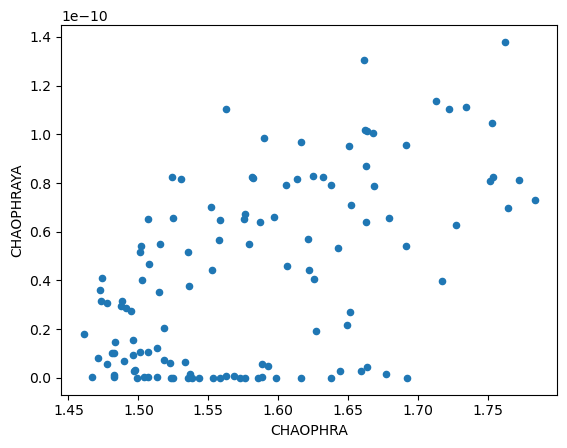

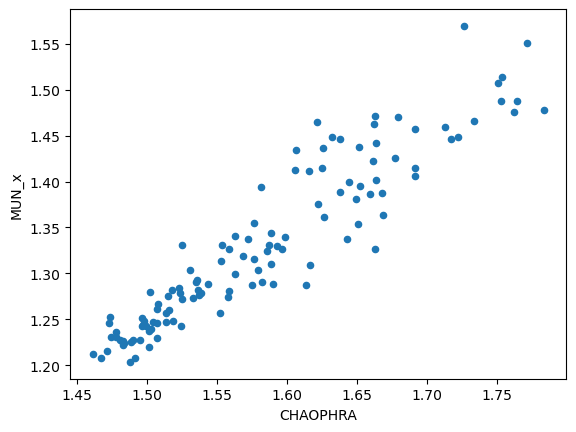

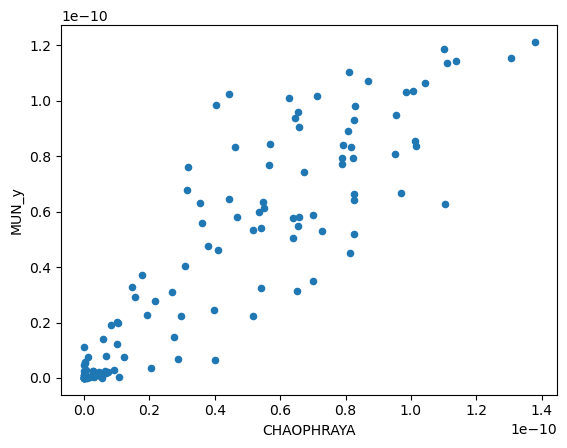

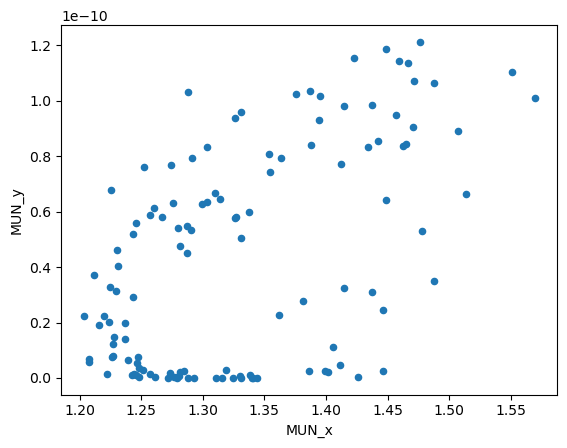

In [26]:
df.plot.scatter("CHAOPHRA","CHAOPHRAYA")
plt.show()
df.plot.scatter("CHAOPHRA","MUN_x")
plt.show()
df.plot.scatter("CHAOPHRAYA","MUN_y")
plt.show()
df.plot.scatter("MUN_x","MUN_y")
plt.show()

On visual inspection, it can be confirmed that the relation between soil moisture storage and surface runoff in these basins is not significantly straightforward.

## Discussions and Conclusions

1. An investigation of **Chao Phraya** and **Mun** river basin data for **Surface Runoff** and **Soil Moisture Storage** revealed that despite very similar surface runoffs, these two basins had significantly distinguishable soil moisture storage.
2. Several EDA techniques, tabular and diagrammatic, point both datasets in both basins to be positively skewed when investigated in isolation and independently from the time dimension.
3. The time series viewpoint revealed an increasing trend for both soil moisture storage and surface runoff across both basins. The analysis also showed a strong annual seasonality in phase. However, a six-month out-of-phase seasonality was also captured for both variables in both basins.
4. An **unremarkable correlation** was found between the surface runoffs and soil moisture storages of the same basin.
5. The inter-catchment correlation of the same variable, i.e. surface runoff to surface runoff and soil moisture to soil moisture, showed significant correlation. This points to the probability of **high regional homogeneity** between the basins.
6. Finally, there is a possibility of achieving better results when the total runoff (surface and subsurface) are considered to be compared with total storage (soil moisture storage and ground water storage), which may explain the scatter in data.